

**A simple stock market prediction using decison tree**

# Importing the necessary libraries

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Reading and visualising the data

In [98]:
df = pd.read_csv('stocks.csv')

In [99]:
#taking just the apple stocks
df_msft = df[df['Name'] == 'MSFT']

In [100]:
df_msft.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1259 entries, 390198 to 391456
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    1259 non-null   object 
 1   open    1259 non-null   float64
 2   high    1259 non-null   float64
 3   low     1259 non-null   float64
 4   close   1259 non-null   float64
 5   volume  1259 non-null   int64  
 6   Name    1259 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 78.7+ KB


In [101]:
df_msft.head()

,date,open,high,low,close,volume,Name
390198,2013-02-08,27.35,27.71,27.31,27.55,33318306,MSFT
390199,2013-02-11,27.65,27.92,27.50,27.86,32247549,MSFT
390200,2013-02-12,27.88,28.00,27.75,27.88,35990829,MSFT
390201,2013-02-13,27.93,28.11,27.88,28.03,41715530,MSFT
390202,2013-02-14,27.92,28.06,27.87,28.04,32663174,MSFT


In [102]:
df_msft.describe()

,open,high,low,close,volume
count,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03
mean,51.026394,51.436007,50.630397,51.063081,3.386946e+07
std,14.859387,14.930144,14.774630,14.852117,1.958979e+07
min,27.350000,27.600000,27.230000,27.370000,7.425603e+06
25%,40.305000,40.637500,39.870000,40.310000,2.254879e+07
50%,47.440000,47.810000,47.005000,47.520000,2.938758e+07
75%,59.955000,60.435000,59.275000,59.730000,3.842024e+07
max,95.140000,96.070000,93.720000,95.010000,2.483542e+08


In [103]:
df_msft.shape

(1259, 7)

# Exploratory data analysis

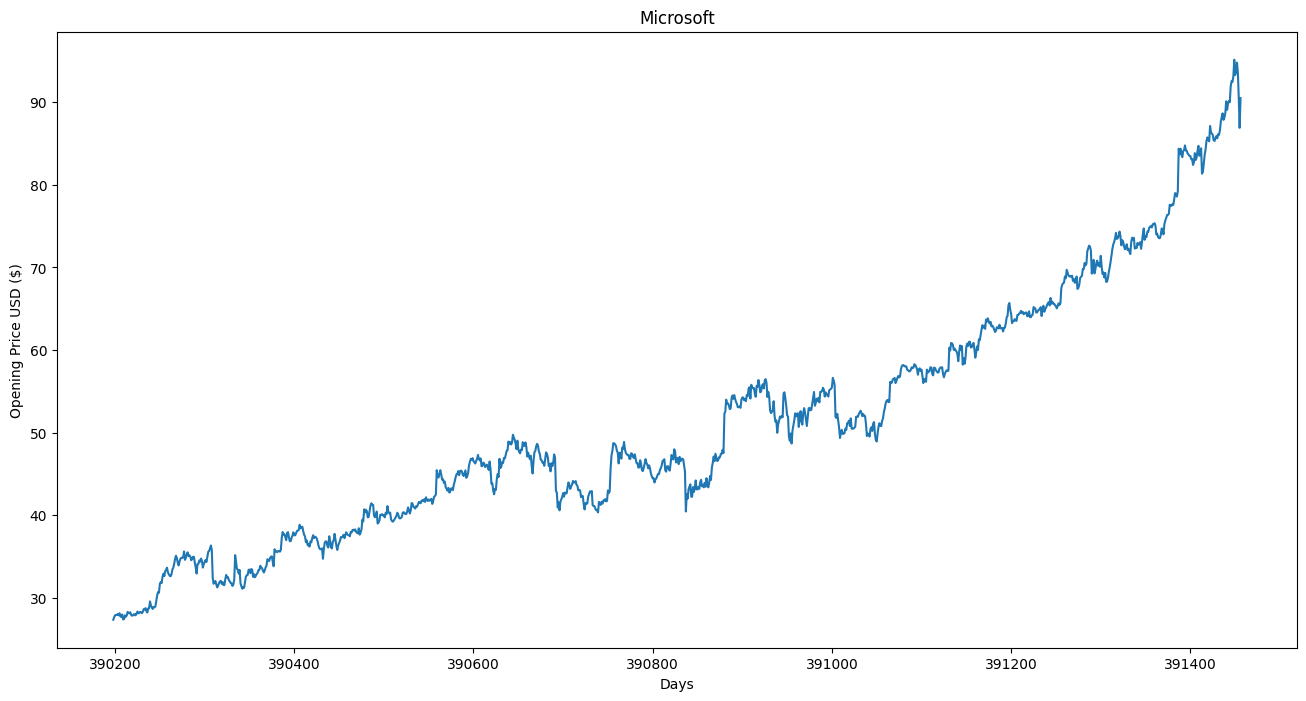

In [104]:
# Visualizing the opening prices of the data.
plt.figure(figsize=(16,8))
plt.title('Microsoft')
plt.xlabel('Days')
plt.ylabel('Opening Price USD ($)')
plt.plot(df_msft['open'])
plt.show()

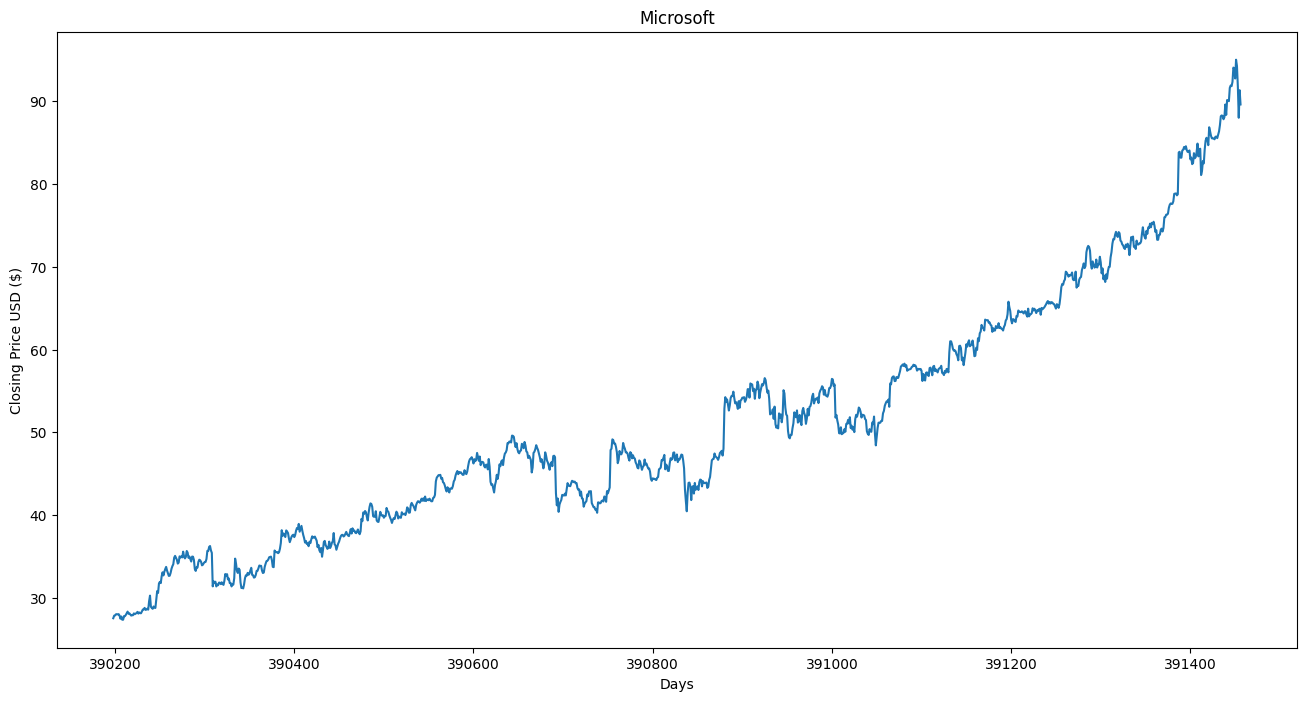

In [105]:
# Visualizing the closing prices of the data.
plt.figure(figsize=(16,8))
plt.title('Microsoft')
plt.xlabel('Days')
plt.ylabel('Closing Price USD ($)')
plt.plot(df_msft['close'])
plt.show()

In [106]:
df2 = df_msft['close']

In [107]:
df2 = pd.DataFrame(df2)


In [108]:
df2.tail()

,close
391452,94.26
391453,91.78
391454,88.00
391455,91.33
391456,89.61


Prediction 100 days into the future.

In [109]:

future_days = 100
df2['Prediction'] = df2['close'].shift(-future_days)

In [110]:
df2.tail()

,close,Prediction
391452,94.26,NaN
391453,91.78,NaN
391454,88.00,NaN
391455,91.33,NaN
391456,89.61,NaN


In [111]:
df2.head()

,close,Prediction
390198,27.55,34.010
390199,27.86,34.210
390200,27.88,34.325
390201,28.03,34.350
390202,28.04,34.700


In [112]:
X = np.array(df2.drop(['Prediction'], axis=1))[:-future_days]
print(X)

[[27.55]
 [27.86]
 [27.88]
 ...
 [74.68]
 [75.21]
 [74.77]]


In [113]:
y = np.array(df2['Prediction'])[:-future_days]
print(y)

[34.01  34.21  34.325 ... 88.    91.33  89.61 ]


# Linear and Decision Tree Regression

In [114]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [115]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

In [116]:
# Implementing Linear and Decision Tree Regression Algorithms.
tree = DecisionTreeRegressor().fit(x_train, y_train)
lr = LinearRegression().fit(x_train, y_train)

In [117]:
x_future = df2.drop(['Prediction'], axis=1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
x_future

array([[67.92],
       [67.83],
       [68.27],
       [68.46],
       [69.41],
       [69.3 ],
       [69.08],
       [68.81],
       [69.  ],
       [68.94],
       [69.04],
       [69.31],
       [68.46],
       [68.38],
       [68.43],
       [69.41],
       [67.48],
       [67.71],
       [67.69],
       [68.45],
       [68.68],
       [68.77],
       [69.62],
       [69.96],
       [70.41],
       [69.84],
       [70.1 ],
       [71.76],
       [72.28],
       [72.52],
       [72.39],
       [71.95],
       [70.32],
       [69.78],
       [70.65],
       [70.27],
       [69.9 ],
       [70.  ],
       [70.87],
       [69.91],
       [70.27],
       [70.26],
       [71.21],
       [70.53],
       [69.21],
       [69.8 ],
       [68.49],
       [68.93],
       [68.17],
       [69.08],
       [68.57],
       [69.46],
       [69.98],
       [69.99],
       [71.15],
       [71.77],
       [72.78],
       [73.35],
       [73.3 ],
       [73.86],
       [74.22],
       [73.79],
       [

# Decision tree prediction

In [118]:
tree_prediction = tree.predict(x_future)
print(tree_prediction)

[75.31  75.16  75.44  74.26  75.105 74.41  78.26  73.26  73.85  83.72
 73.85  74.61  74.26  74.69  75.97  75.105 76.29  76.29  76.42  77.12
 77.49  77.65  77.59  77.61  77.91  78.81  78.83  78.86  78.63  78.76
 83.81  83.89  83.18  83.18  84.05  83.93  84.47  84.27  84.56  84.09
 83.93  83.93  84.05  82.98  83.2   82.4   82.53  83.72  83.11  78.26
 83.87  84.88  83.34  84.17  84.26  81.08  85.54  82.78  82.49  85.58
 95.01  85.58  85.35  86.85  86.85  88.35  85.83  85.71  78.76  78.63
 87.5   85.71  85.72  85.54  85.95  86.35  87.11  88.19  88.28  88.22
 85.72  88.08  87.5   88.35  85.71  85.71  90.    91.61  91.9   94.26
 92.33  94.26  93.92  92.74  95.01  94.26  92.33  92.33  91.33  92.33 ]


 # Linear regression prediction

In [119]:
lr_prediction = lr.predict(x_future)
print(lr_prediction)

[75.23878286 75.13556308 75.64019311 75.85810153 76.94764364 76.82148613
 76.56917112 76.25951178 76.4774202  76.40860702 76.52329566 76.83295499
 75.85810153 75.76635061 75.82369494 76.94764364 74.73415283 74.99793671
 74.97499898 75.84663266 76.11041654 76.21363632 77.18848979 77.57843117
 78.09453007 77.4408048  77.73899527 79.64282675 80.23920769 80.51446043
 80.3653652  79.86073517 77.99131029 77.37199162 78.36978281 77.93396597
 77.50961799 77.62430663 78.62209782 77.52108685 77.93396597 77.9224971
 79.01203921 78.23215644 76.71826635 77.39492934 75.89250812 76.39713815
 75.52550446 76.56917112 75.98425904 77.00498796 77.6013689  77.61283777
 78.94322603 79.65429561 80.81265091 81.46637617 81.40903185 82.05128825
 82.46416736 81.9710062  81.75309778 82.42976077 82.26919667 81.24846775
 81.11084138 80.72089999 80.58327362 80.21626996 80.09011246 80.69796226
 80.37683406 80.82411977 80.45711611 79.2414165  80.49152271 81.74162891
 81.31728094 81.8104421  80.37683406 80.48005384 80.

In [128]:
predictions = tree_prediction
valid = df2[X.shape[0]:]
valid['Predictions'] = predictions

C:\Users\40756\AppData\Local\Temp\ipykernel_8212\2245677998.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


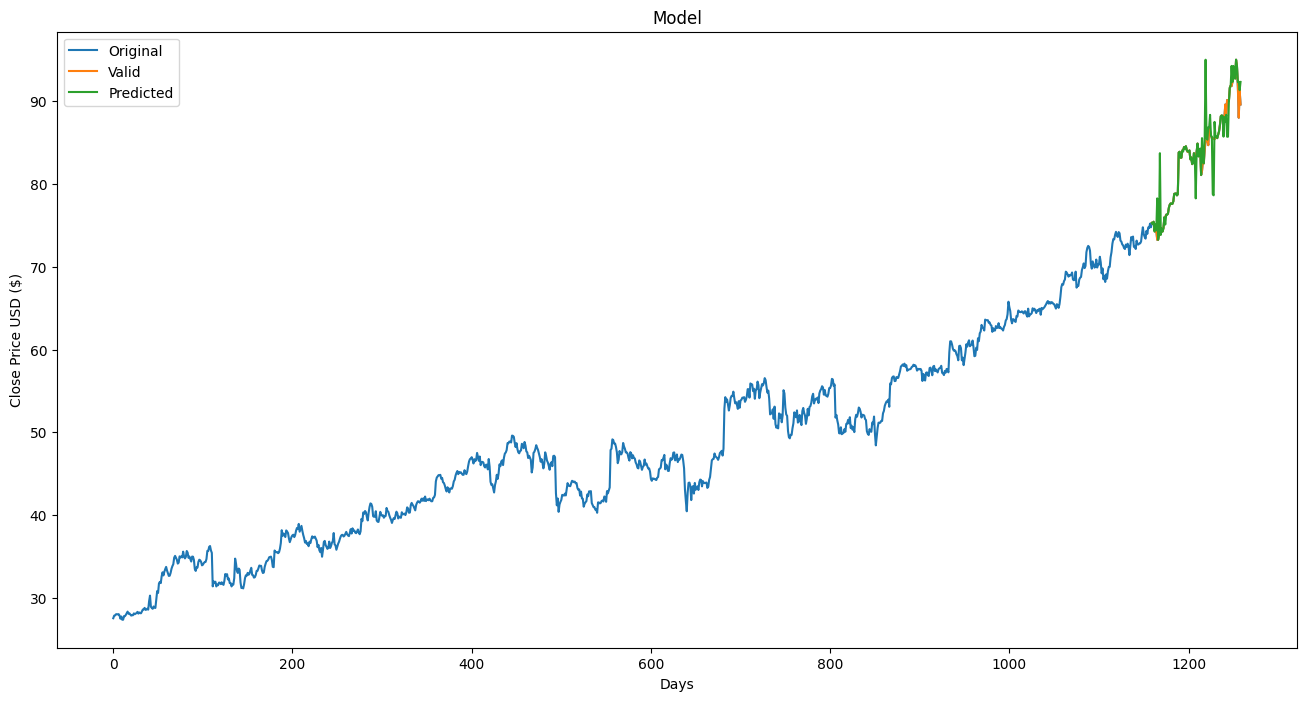

In [130]:

plt.figure(figsize=(16,8))
plt.title("Model")
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
plt.plot(df2['close'])
plt.plot(valid[['close', 'Predictions']])
plt.legend(["Original", "Valid", 'Predicted'])
plt.show()

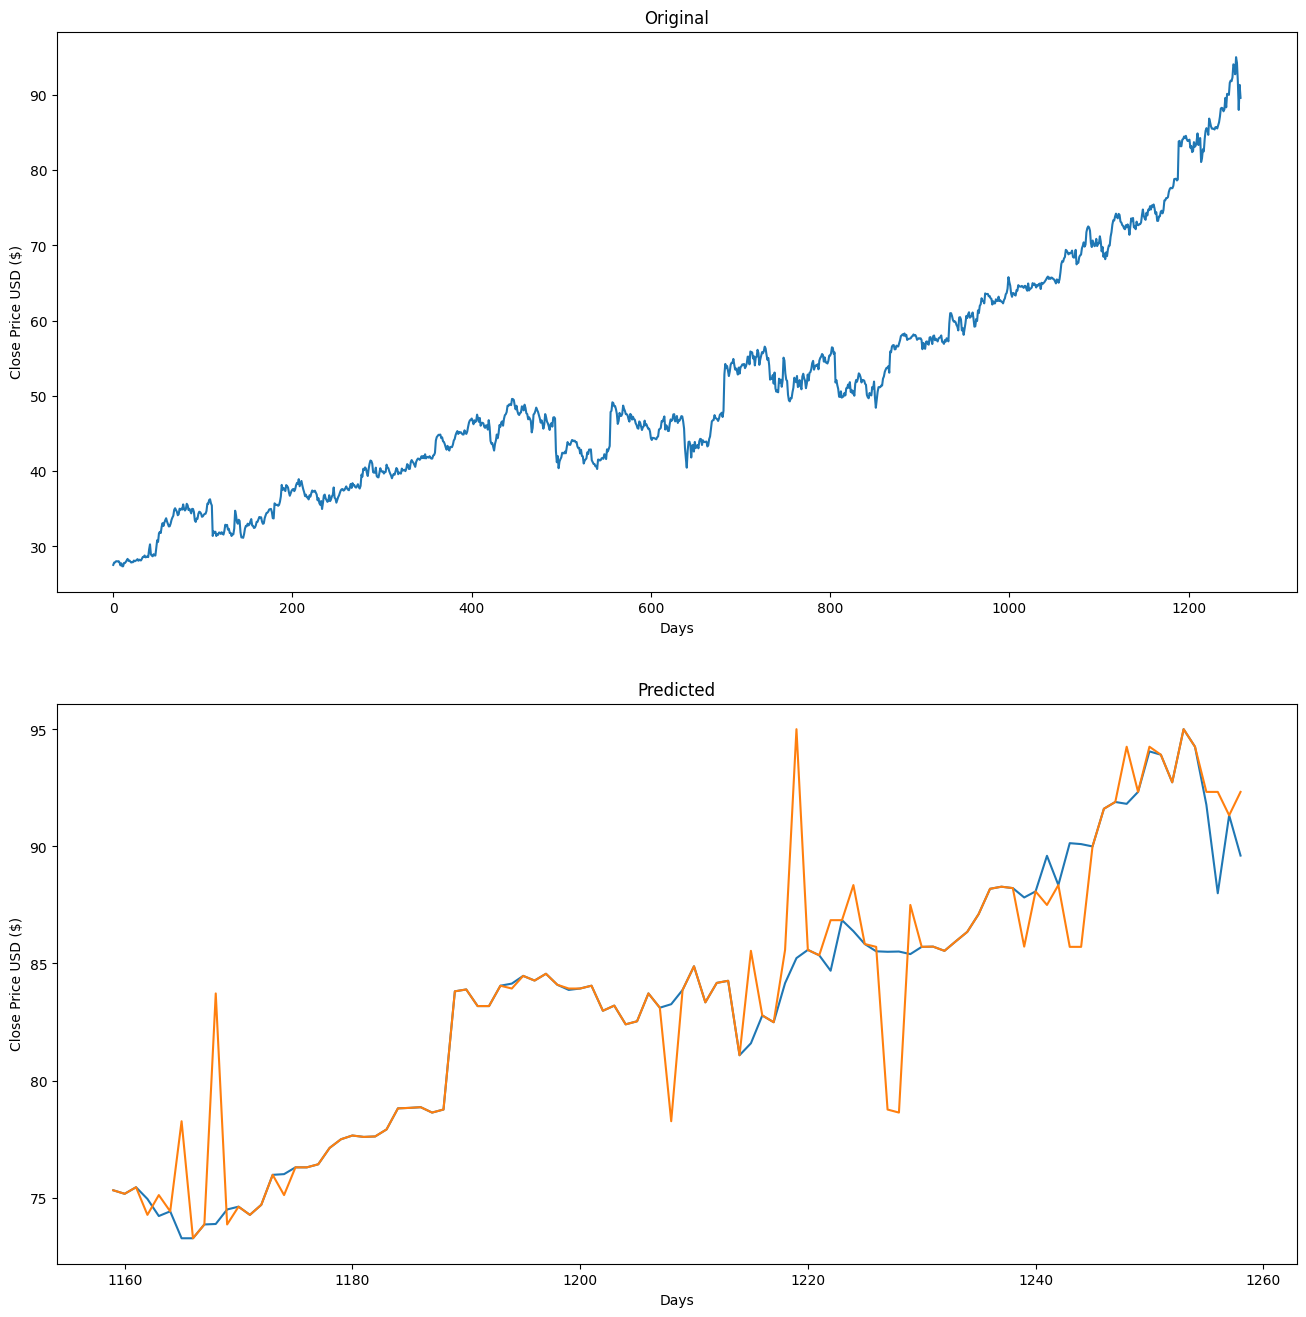

In [131]:
fig, axs = plt.subplots(2, figsize=(16,16))

# Plot for original data
axs[0].plot(df2['close'])
axs[0].set_title('Original')
axs[0].set_xlabel('Days')
axs[0].set_ylabel('Close Price USD ($)')

# Plot for predicted data
axs[1].plot(valid[['close', 'Predictions']])
axs[1].set_title('Predicted')
axs[1].set_xlabel('Days')
axs[1].set_ylabel('Close Price USD ($)')

plt.show()


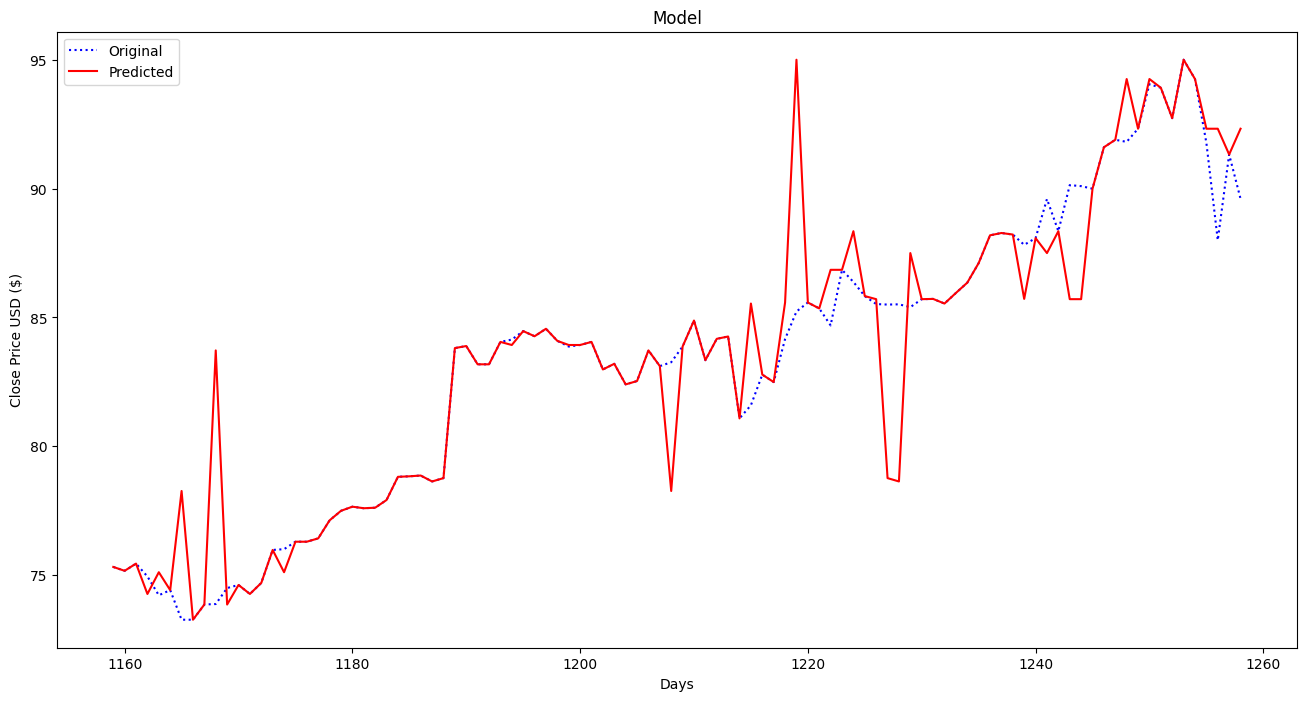

In [132]:
plt.figure(figsize=(16,8))
plt.title("Model")
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
plt.plot(valid['close'], linestyle='dotted', color='blue')  # Original data with dotted line
plt.plot(valid['Predictions'], color='red')  # Predicted data
plt.legend(["Original", "Predicted"])
plt.show()
